# Exploratory Data Analysis and model building

## EDA

id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
trip_duration - (target) duration of the trip in seconds

# importing libraries and dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\nyc_taxi_trip_duration.csv')

In [3]:
#first 5 instances using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#last 5 instances using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


# finding out the shape of the data using "shape" variable: Output (rows, columns)

In [5]:

data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# Missing Values


Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Variable Identification and Typecasting

In [8]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

There are a lot of variables visible at once, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type

In [9]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

Summary:

*    **vendor id** are a unique number assigned to taxi. It can be **stored as Integer**.

*    **passenger count** no of passengers for trip can be stored as integer

*    **trip duration** are no of days that trip is carried out can be stored as integer.




### Float Data Type

In [10]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

Summary:

*    **pickup_longitude** is geographical longitude info can be float type**

*    **pickup_latitude**is geographical latitude info can be float type**

*    ** dropoff_longitude ** is geographical longitude info can be float type**
*    **dropoff_latitude ** is geographical latitude info can be float type**

### Object Data Type has to be converted into categorical type

In [11]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

*    **variables like 'id', 'pickup_datetime' and 'dropoff_datetime' and 'store_and_fwd_flagare' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [12]:
# Manually checking object types
data[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(7)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,id1918069,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,id2429028,2016-04-20 20:30:14,2016-04-20 20:36:51,N


*    **id** and **store_and_fwd_flag** variables **belong to categorical data types**.
*    **pickup_datetime** and **dropoff_datetime** should be a  **datetime variable**.

# typecasting "id" and "store_and_fwd_flag" to category type

In [13]:

data['id'] = data['id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')



# Target Exploration


In this section we will take a look at the trip duration which is the target variable.
It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [14]:
data['trip_duration'].describe()/3600 # Trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Woah! There is a trip with duration of 979 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform the trip duration
before prediction to visualise it better.

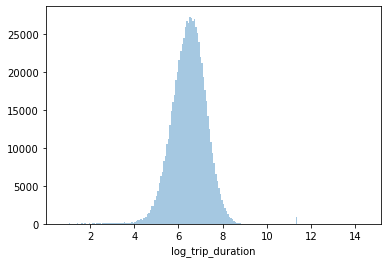

In [15]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

We find:

The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5) i.e. about 17 minutes.
There are several suspiciously short rides with less than 10 seconds duration.
As discussed earlier, there are a few huge outliers near 12.

### datetime Data Type

# extracting new columns from "pickup_datetime"

In [16]:
# creating an instance(date) of DatetimeIndex class using "pickup_datetime"
date = pd.DatetimeIndex(data['pickup_datetime'])

In [17]:


# last day of year when transaction was done
data['doy_pickup'] = date.dayofyear

# week of year when last transaction was done
data['woy_pickup'] = date.weekofyear

# month of year when last transaction was done
data['moy_pickup'] = date.month

# day of week when last transaction was done
data['dow_pickup'] = date.dayofweek

# checking new extracted columns using datetime

In [18]:

data[['pickup_datetime','doy_pickup','woy_pickup','moy_pickup','dow_pickup']].head()

,pickup_datetime,doy_pickup,woy_pickup,moy_pickup,dow_pickup
0,2016-02-29 16:40:21,60,9,2,0
1,2016-03-11 23:35:37,71,10,3,4
2,2016-02-21 17:59:33,52,7,2,6
3,2016-01-05 09:44:31,5,1,1,1
4,2016-02-17 06:42:23,48,7,2,2


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the pick up was done from different services**. Now that we have extracted the essentials from the pickup_date variables, we will drop it from the dataset.



# Droping pickup_datetime it is not required further

In [19]:
data = data.drop(columns = ['pickup_datetime'])
data.dtypes

id                    category
vendor_id                int64
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
log_trip_duration      float64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
dtype: object

In [20]:
# creating an instance(date) of DatetimeIndex class using "dropoff_datetime"
date = pd.DatetimeIndex(data['dropoff_datetime'])

# extracting new columns from "dropoff_datetime"

In [21]:


# last day of year when transaction was done
data['doy_dropoff'] = date.dayofyear

# week of year when last transaction was done
data['woy_dropoff'] = date.weekofyear

# month of year when last transaction was done
data['moy_dropoff'] = date.month

# day of week when last transaction was done
data['dow_dropoff'] = date.dayofweek

# checking new extracted columns using datetime

In [22]:

data[['dropoff_datetime','doy_dropoff','woy_dropoff','moy_dropoff','dow_dropoff']].head()

,dropoff_datetime,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
0,2016-02-29 16:47:01,60,9,2,0
1,2016-03-11 23:53:57,71,10,3,4
2,2016-02-21 18:26:48,52,7,2,6
3,2016-01-05 10:03:32,5,1,1,1
4,2016-02-17 06:56:31,48,7,2,2


The first column is the complete date of the dropof which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the drop off was done.

**Breaking down the date variable** into these granular information will **help us in understand when the pick up was done from different services**. Now that we have extracted the essentials from the drop off variables, we will drop it from the dataset.


In [23]:
data = data.drop(columns = ['dropoff_datetime'])
data.dtypes

id                    category
vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
log_trip_duration      float64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
dtype: object

# Univariate Analysis: Numerical Variables

# Select Numerical datatypes

In [24]:

data.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
log_trip_duration    float64
doy_pickup             int64
woy_pickup             int64
moy_pickup             int64
dow_pickup             int64
doy_dropoff            int64
woy_dropoff            int64
moy_dropoff            int64
dow_dropoff            int64
dtype: object

# seggregating variables into groups trip info,pickup info,dropoff info


In [25]:

trip_info = ['id','vendor_id','passenger_count','trip_duration','store_and_fwd_flag']
pickup_info = ['pickup_longitude','pickup_latitude','doy_pickup','woy_pickup','moy_pickup','dow_pickup']
dropoff_info = ['dropoff_longitude','dropoff_latitude','doy_dropoff','moy_dropoff','woy_dropoff','dow_dropoff']


# custom function for easy and efficient analysis of numerical univariate

In [26]:


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### trip_information

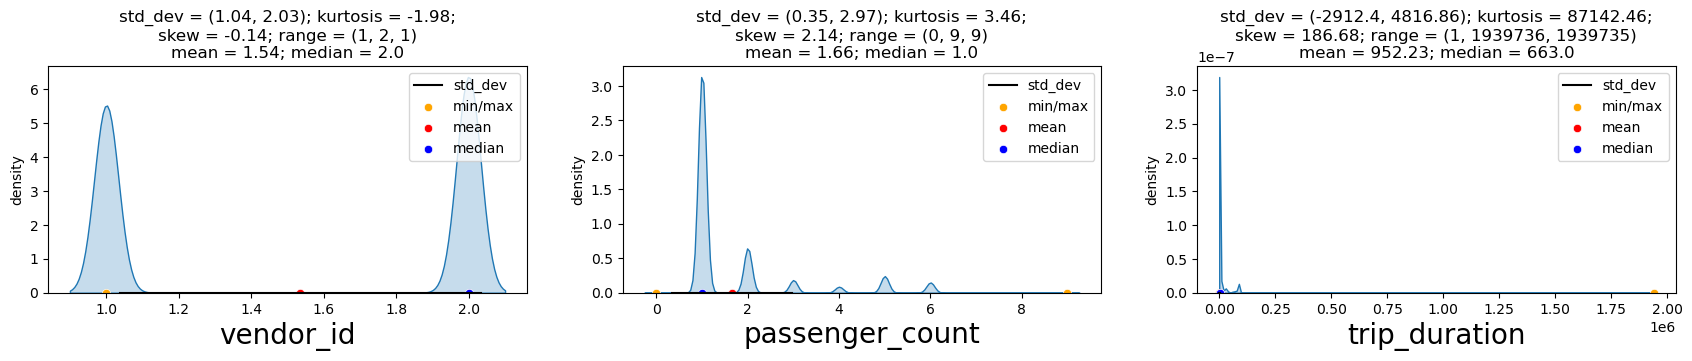

In [27]:
UVA_numeric(data,['vendor_id','passenger_count','trip_duration'])

**Summary of trip_info:**
*    **vendor id**:
     *   vendor2 is most significant than vendor1 and is more popular 

*    **passenger_count**:
   *   single passenger trip is most popular among taxi
    ** trip_duration **
    * usually people uses taxi services less than 6 hr each time
    
   **Inference**
   A single passenger uses taxi service less than 6 hr distance each trip means that they may be using taxi for official purposes other than that of family purpose
    



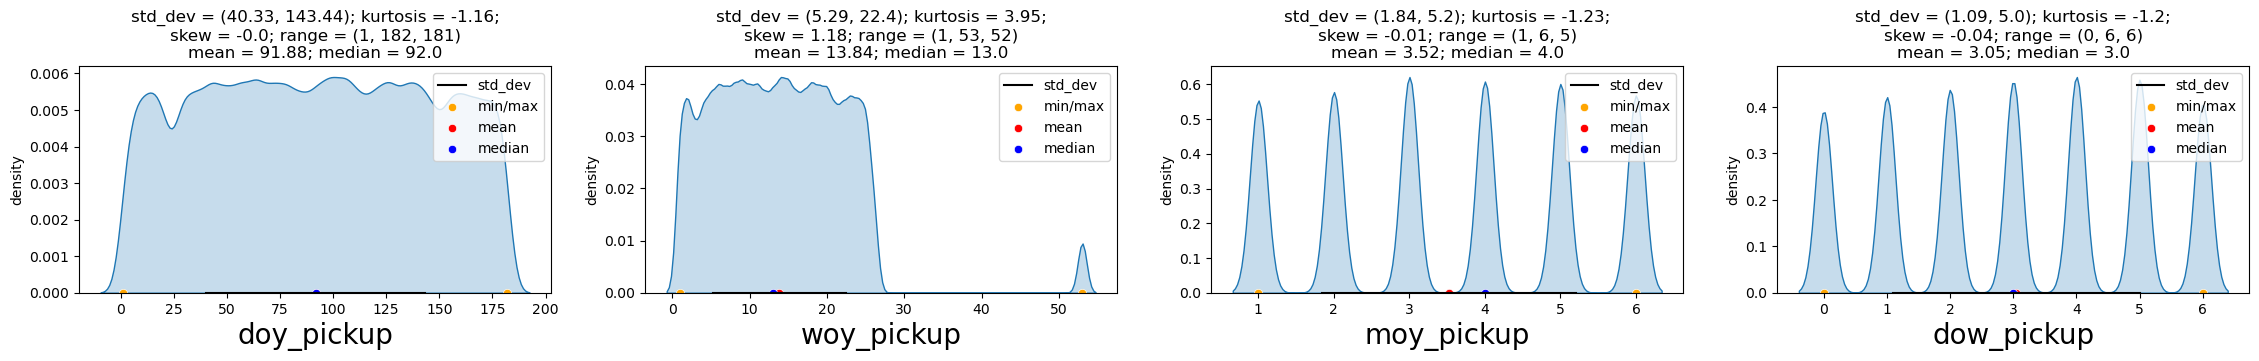

In [28]:
UVA_numeric(data,['doy_pickup','woy_pickup','moy_pickup','dow_pickup'])

** summary 

**  first half of year shows significant number of taxi travelling  in a year ie 1-175 days of every year


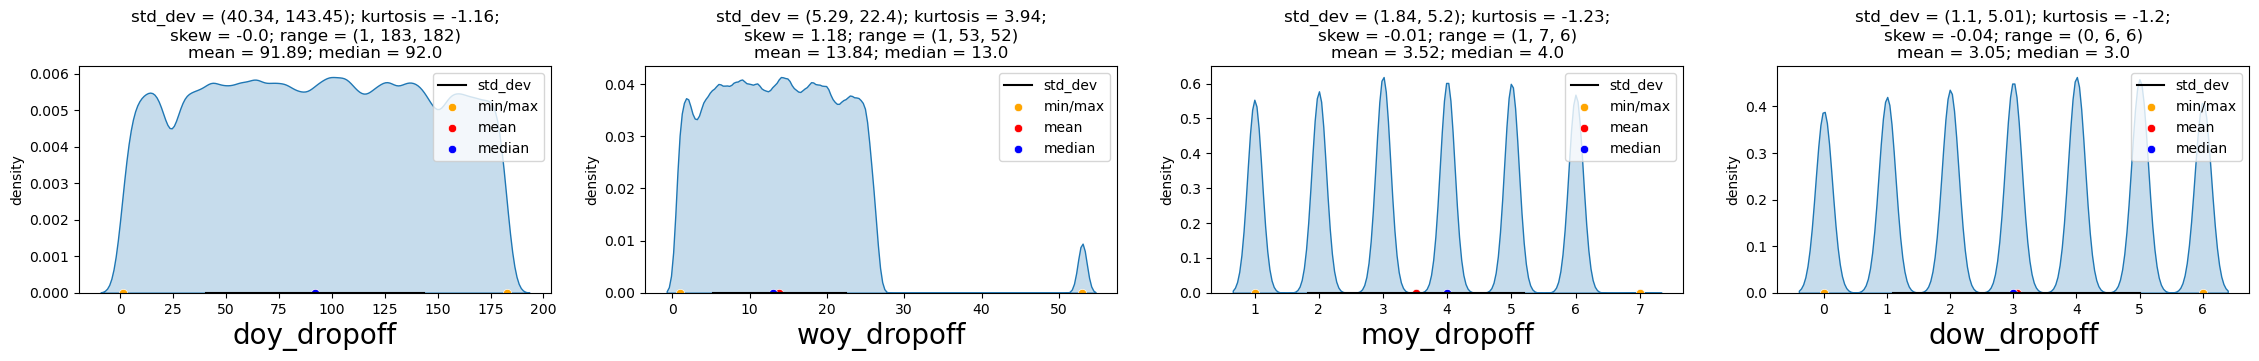

In [29]:
UVA_numeric(data,['doy_dropoff','woy_dropoff','moy_dropoff','dow_dropoff'])

### pickup/dropoff geography

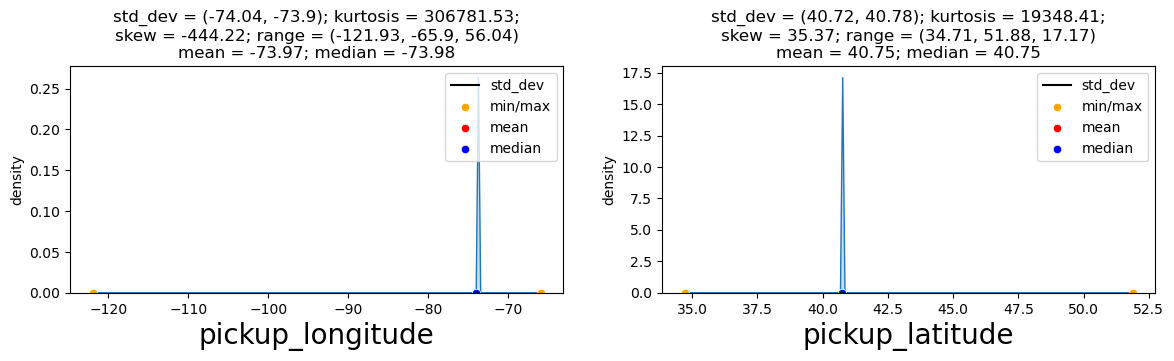

In [30]:
UVA_numeric(data,['pickup_longitude','pickup_latitude'])

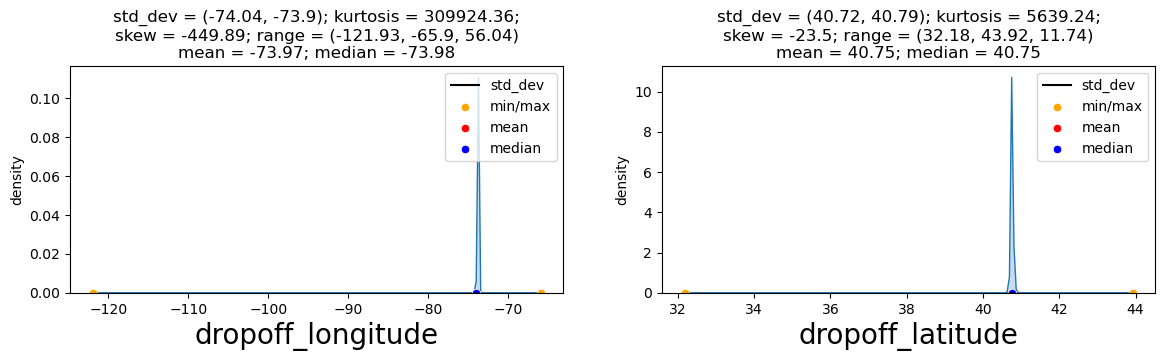

In [31]:
UVA_numeric(data,['dropoff_longitude','dropoff_latitude'])

**Summary**
*    Considering the kurtosis and skewness value  for all  of these plots. Outliers/Extreme values are obvious.
Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.

# **Need to Remove Outliers to visulaise these plots**

In [32]:
# checking how many points removed
#len(data), len(cm_data)
# standard deviation factor
factor = 3

# copying pickup_info
cm_data = data[pickup_info]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['pickup_longitude'] < factor*cm_data['pickup_longitude'].std()]
cm_data = cm_data[cm_data['pickup_latitude'] < factor*cm_data['pickup_latitude'].std()]

# copying dropoff_info
cm_data = data[dropoff_info]
cm_data = cm_data[cm_data['dropoff_longitude'] < factor*cm_data['dropoff_longitude'].std()]
cm_data = cm_data[cm_data['dropoff_latitude'] < factor*cm_data['dropoff_latitude'].std()]

# checking how many points removed
len(data), len(cm_data)

(729322, 0)

In [33]:
data.shape

(729322, 18)

# Univariate Analysis : using Categorical Varibales

In [34]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                    category
store_and_fwd_flag    category
dtype: object

**Grouping Varibales**

* **id**: id of traveller
* **store_and_fwd_flag**: will they recommend or not


# Custom function for easy visualisation of Categorical Variables

In [35]:

def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### trip_info

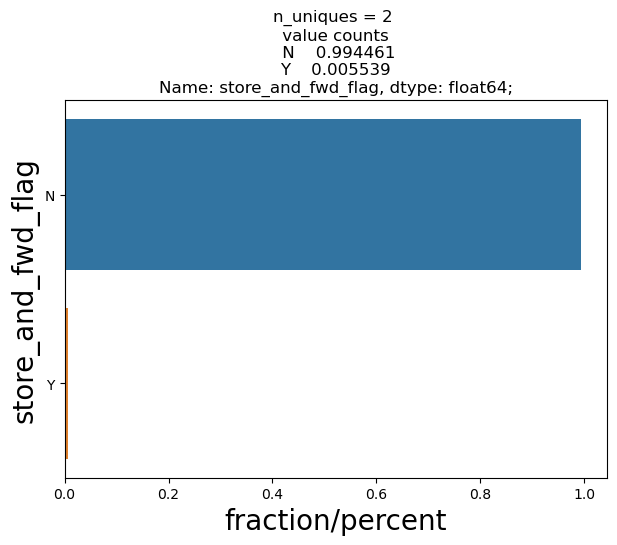

In [36]:
UVA_category(data, ['store_and_fwd_flag'])

**Summary**
* store_and_fwd_flag
  * 99% vehicle are not recording the trip details 
  ** store_and_fwd_flag filed can be removed from data set as the information is obtained after the target information so it has no effect in modeling
  *

**Things to investigate further down:**
* Possibility: Trip vndors may promote security/privacy so that they may not record any trip details


## Univariate: Missing Values

# finding number of missing values in every variable

In [37]:
data.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
doy_pickup            0
woy_pickup            0
moy_pickup            0
dow_pickup            0
doy_dropoff           0
woy_dropoff           0
moy_dropoff           0
dow_dropoff           0
dtype: int64

## Univariate Analysis: Outliers

**We suspected outliers in pickup_info and dropoff_info variable groups. We will verify that using bo plots**

# custom function for easy outlier analysis

In [38]:


def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### remove outlier for pickup  and dropoff info

True
True
True
True


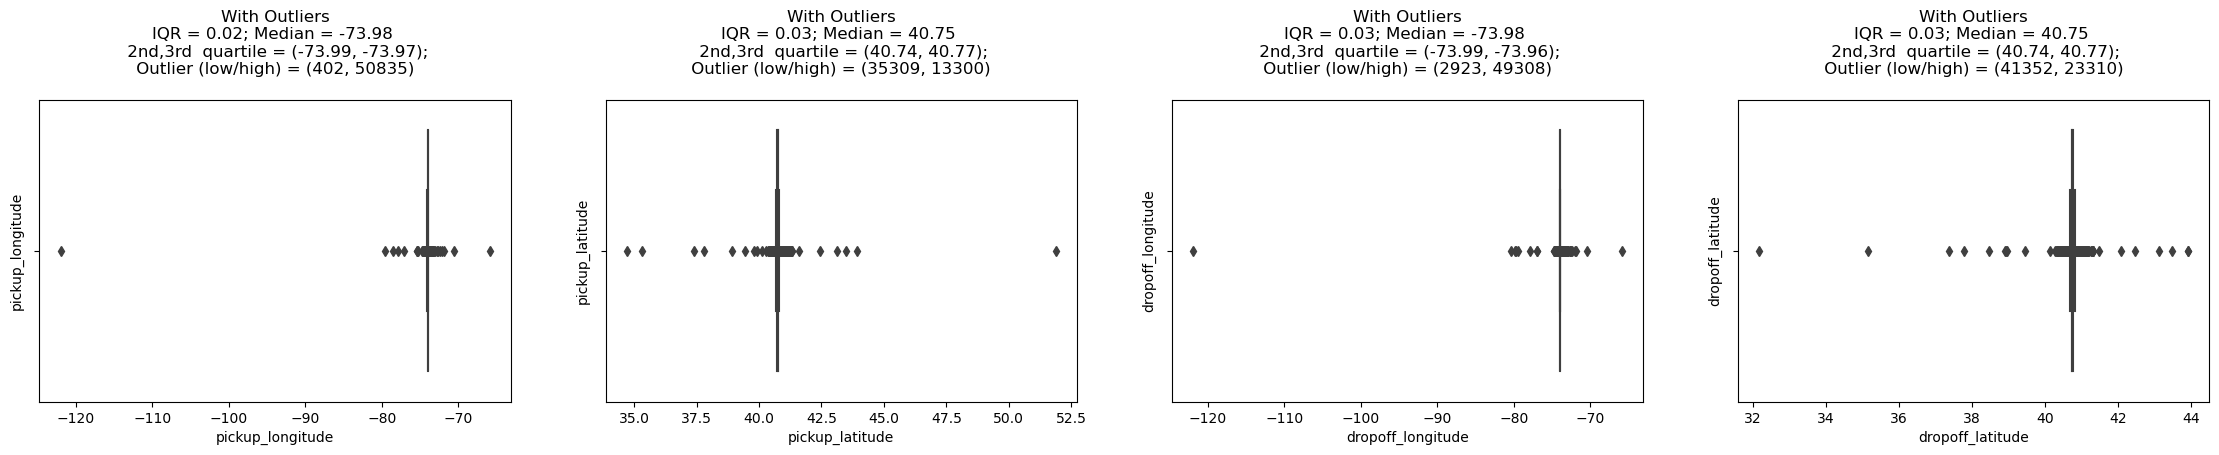

In [39]:
UVA_outlier(data, ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],include_outlier=True)

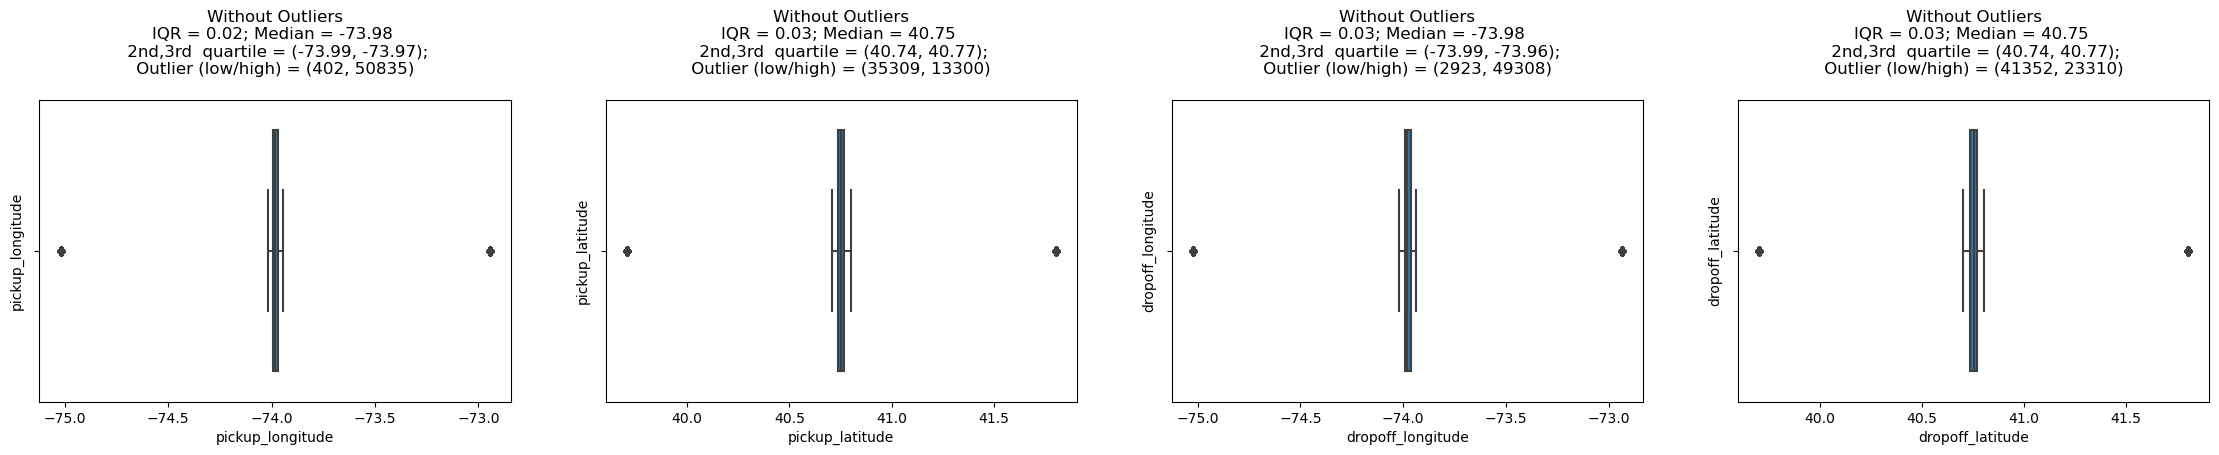

In [40]:
UVA_outlier(data, ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], include_outlier=False)

# Investigation directions from Univariate Analysis
1. id variable can be dropped.
2.  here are some common trait/relation between the customers who are calling taxi service?
   * first 6 months of year conducting most trips
   * each trip carries less than 6 hr duration and traveller as a single person may indicate that official travel - do more research on this
   * vendor2 put of 2 vendors is choosing most times for travel
4.  middle three days of week ie Tuesday,wednesday and Thursday for their travel this also points to the official travel 



# Bivariate Analysis : Numerical-Numerical

# isolating numerical datatypes for visualisation

In [41]:

numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
log_trip_duration    float64
doy_pickup             int64
woy_pickup             int64
moy_pickup             int64
dow_pickup             int64
doy_dropoff            int64
woy_dropoff            int64
moy_dropoff            int64
dow_dropoff            int64
dtype: object

# Correlation Matrix for collinearity between features

In [42]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,0.019439,-0.005227,-0.001291,-0.005363,0.000787,-0.005203,-0.001335,-0.005336,0.000900
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.020749,-0.001182,0.005154,-0.001481,0.025758,-0.001168,0.005114,-0.001497,0.025941
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.112302,0.003737,0.006579,0.004037,-0.016031,0.003764,0.006509,0.004090,-0.016846
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.142551,-0.001244,-0.004786,-0.000165,-0.029073,-0.001313,-0.004787,-0.000233,-0.029254
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.072944,0.003762,0.005541,0.003883,-0.001473,0.003787,0.005554,0.003923,-0.001396
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.124989,-0.001627,-0.002402,-0.000580,-0.022028,-0.001673,-0.002406,-0.000621,-0.022396
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.327624,0.009418,0.007907,0.009378,-0.002302,0.010285,0.007072,0.010135,-0.003369
log_trip_duration,0.019439,0.020749,0.112302,-0.142551,0.072944,-0.124989,0.327624,1.000000,0.048479,0.027958,0.047342,-0.028439,0.048757,0.027659,0.047677,-0.027352
doy_pickup,-0.005227,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.009418,0.048479,1.000000,0.713257,0.985661,-0.012497,0.999998,0.713902,0.985660,-0.012225
woy_pickup,-0.001291,0.005154,0.006579,-0.004786,0.005541,-0.002402,0.007907,0.027958,0.713257,1.000000,0.721769,0.039290,0.713256,0.999310,0.721761,0.039095


### Heatmap

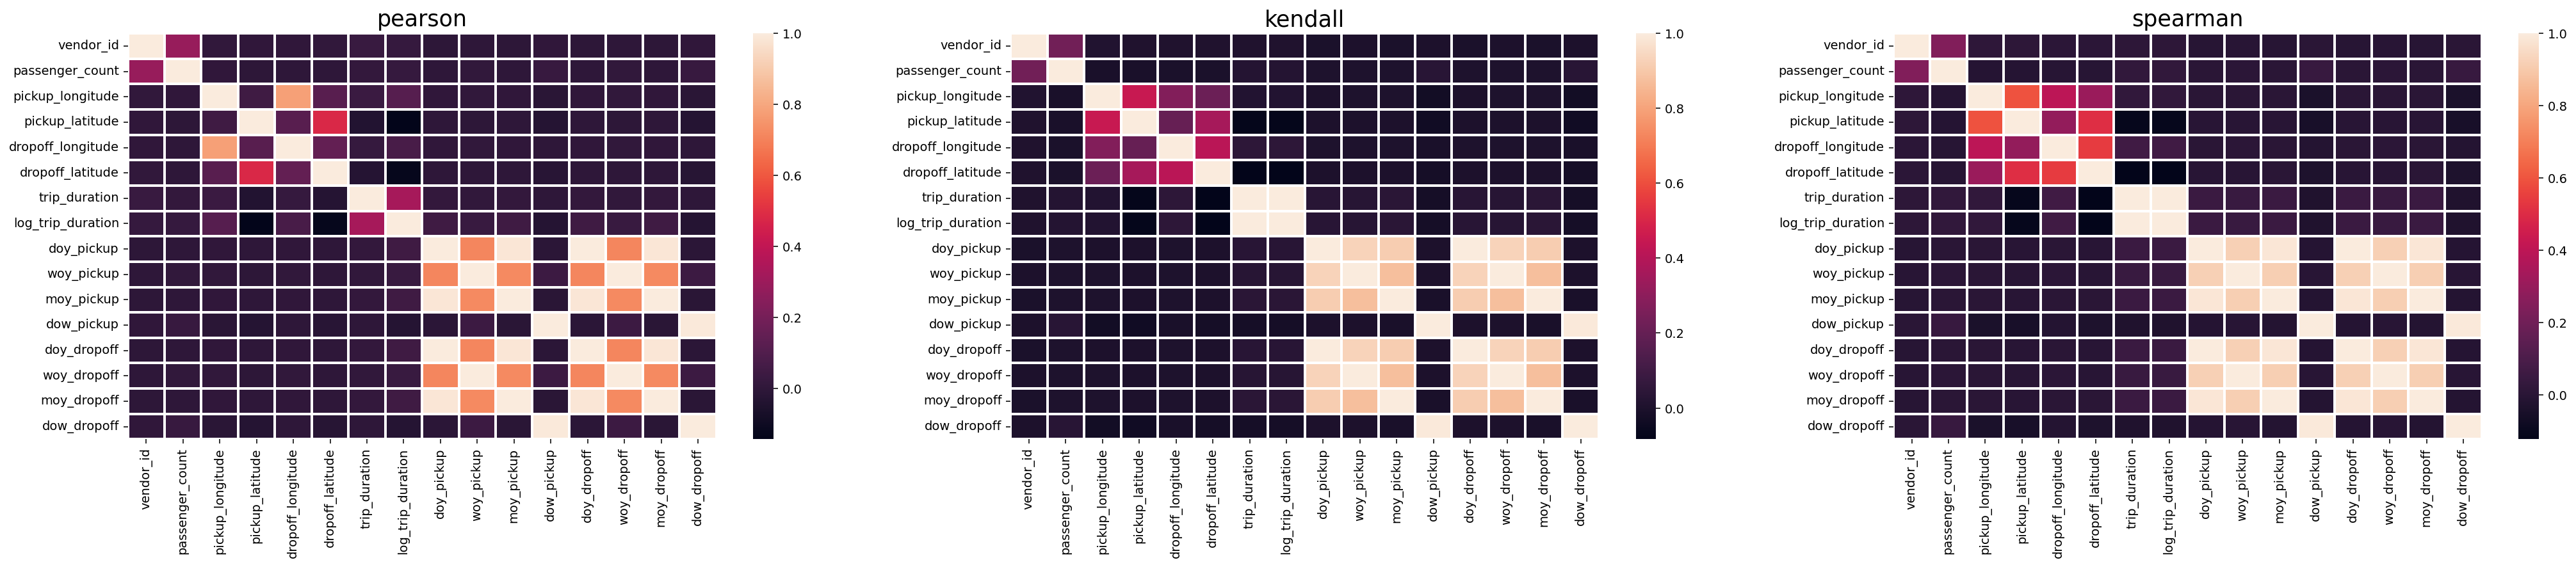

In [43]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  vendor id, passenger_count and trip_duration has no significant correlation.
*  Major correlation lies between the latitude and longitude values.

Inference 

The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5) i.e. about 17 minutes.
There are several suspiciously short rides with less than 10 seconds duration.
As discussed earlier, there are a few huge outliers near 12.
Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
Vendor 2 has more number of trips as compared to vendor 1
Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
We see that most trips are concentrated between these lat long only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms
Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
Median trip duration does not vary much as can be seen from the above plot for different vendors.
The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.
From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.

# extracting pickup and drop off information of every trip

In [44]:
var = []
var.extend(pickup_info)
var.extend(dropoff_info)


# plotting heatmap  for allpickup and drop off variables

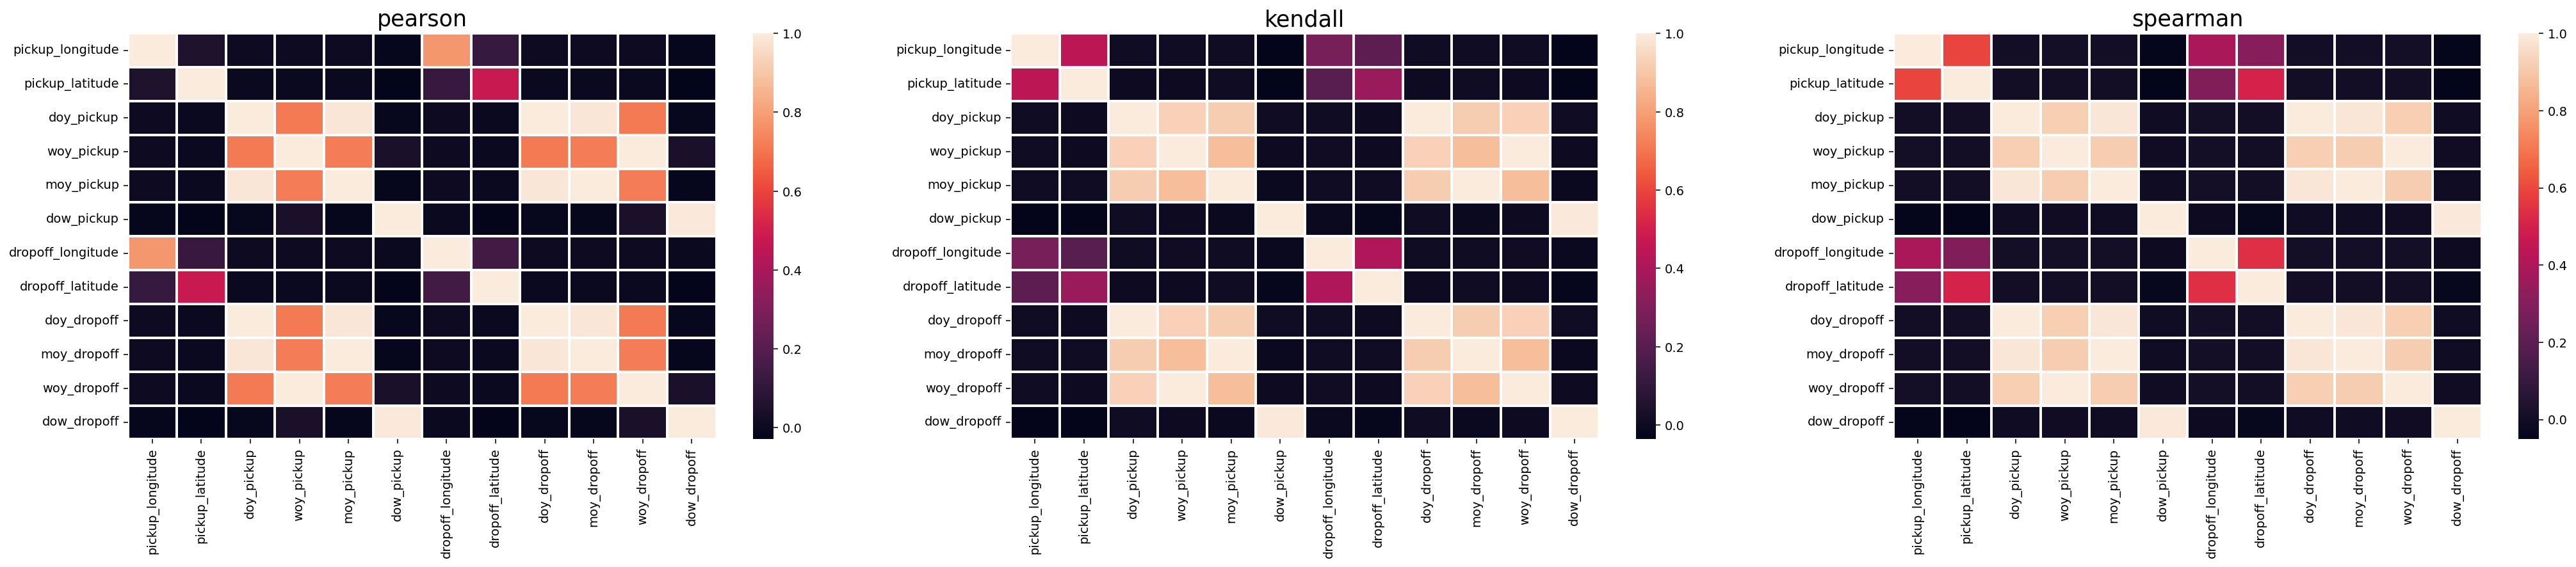

In [45]:

plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.  In all 3 type of correlations pickup date and dropoff date  have a strong correlation among themselves.
2.  No other varables have no other significance between variables




# Scatterplot

# Grouping variables for pickup_info,dropoff_info

In [46]:
print(data.columns)

pickup_info = ['doy_pickup','woy_pickup','moy_pickup','dow_pickup']
dropoff_info = ['doy_dropoff','woy_dropoff','moy_dropoff','dow_dropoff']

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration',
       'doy_pickup', 'woy_pickup', 'moy_pickup', 'dow_pickup', 'doy_dropoff',
       'woy_dropoff', 'moy_dropoff', 'dow_dropoff'],
      dtype='object')


# scatter plot for pick up variables

<Figure size 840x560 with 0 Axes>

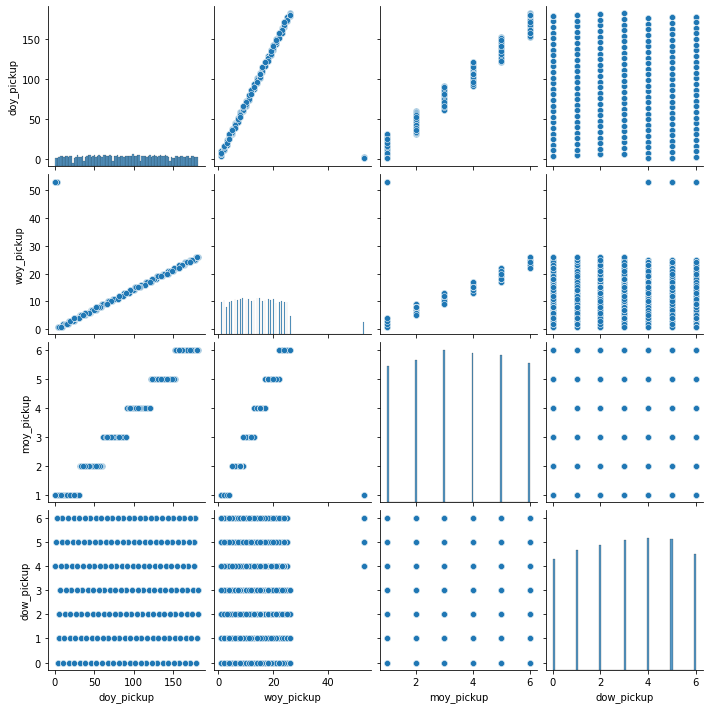

In [47]:

plt.figure(dpi=140)
sns.pairplot(numerical[pickup_info])

# scatter plot for dropoff variables

<Figure size 840x560 with 0 Axes>

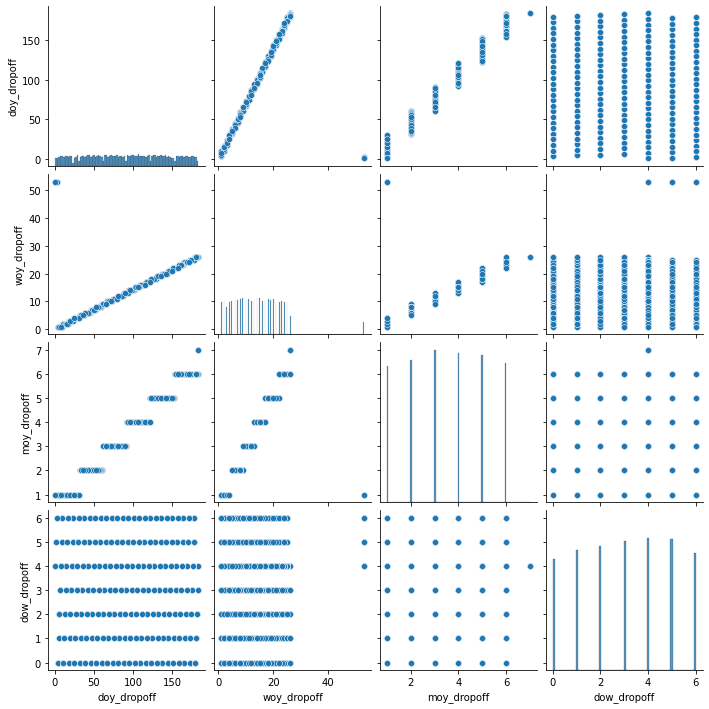

In [48]:

plt.figure(dpi=140)
sns.pairplot(numerical[dropoff_info])

# Bivariate Analysis: Continuous-Categorical variables with target variable


List of Hypothesis and investigation to perform under this combination.



In [49]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [50]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [51]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

# 1. Are vendor2 record video of tour?¶

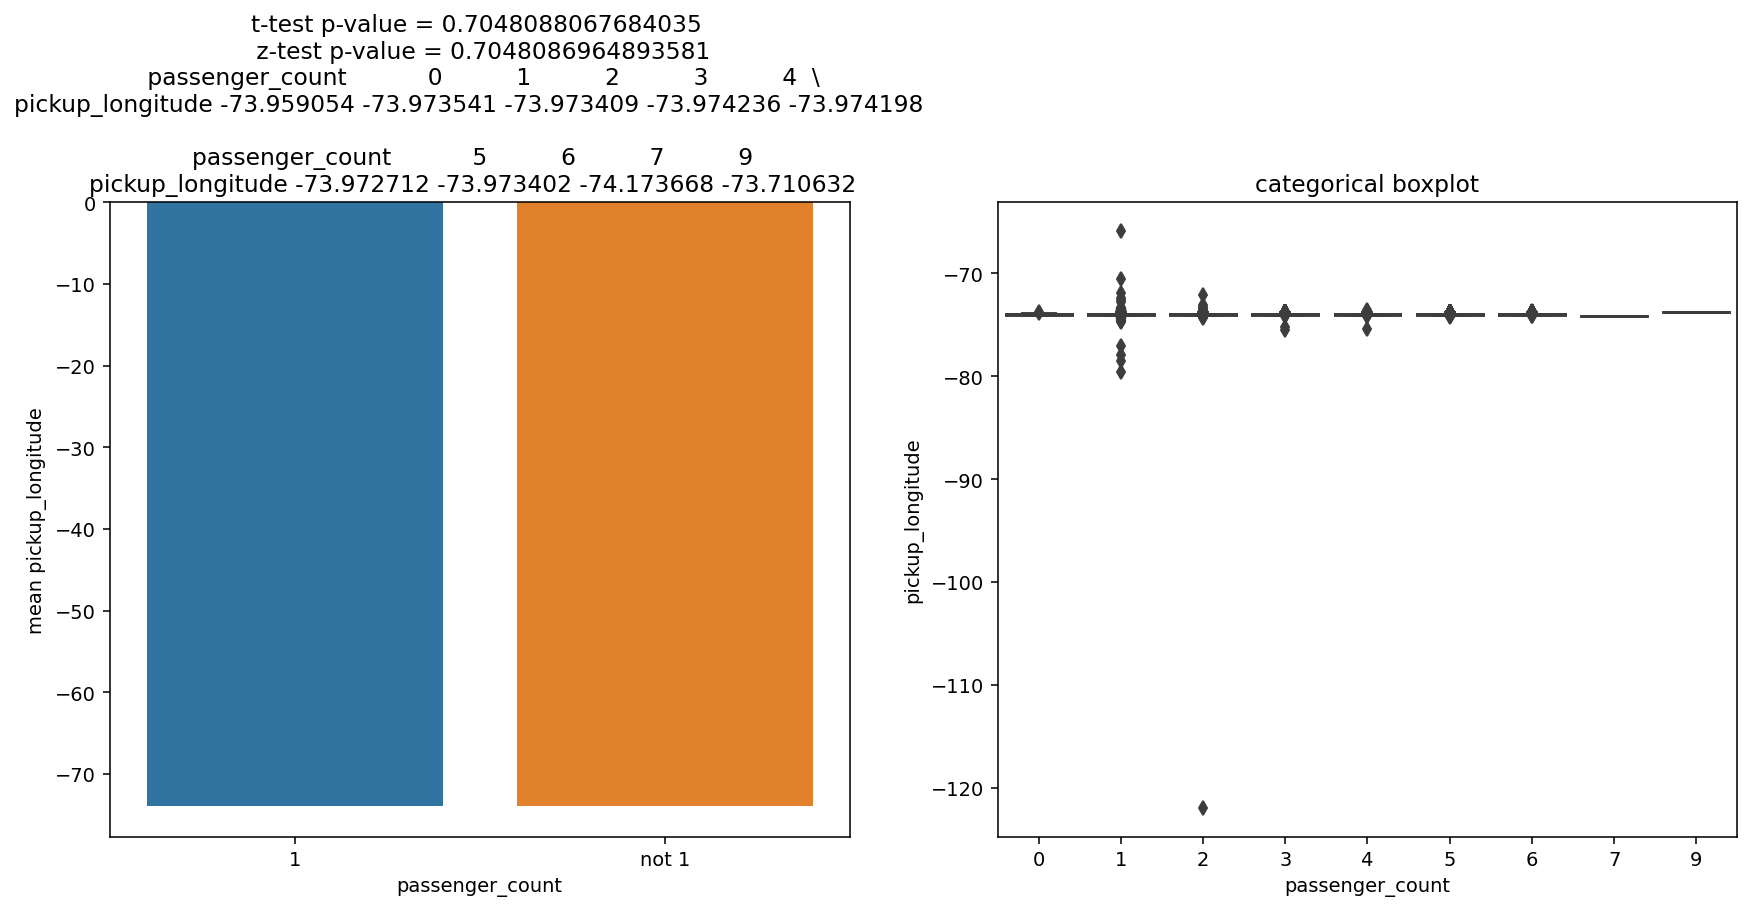

In [52]:

data.dtypes
Bivariate_cont_cat(data, 'pickup_longitude', 'passenger_count', 1)

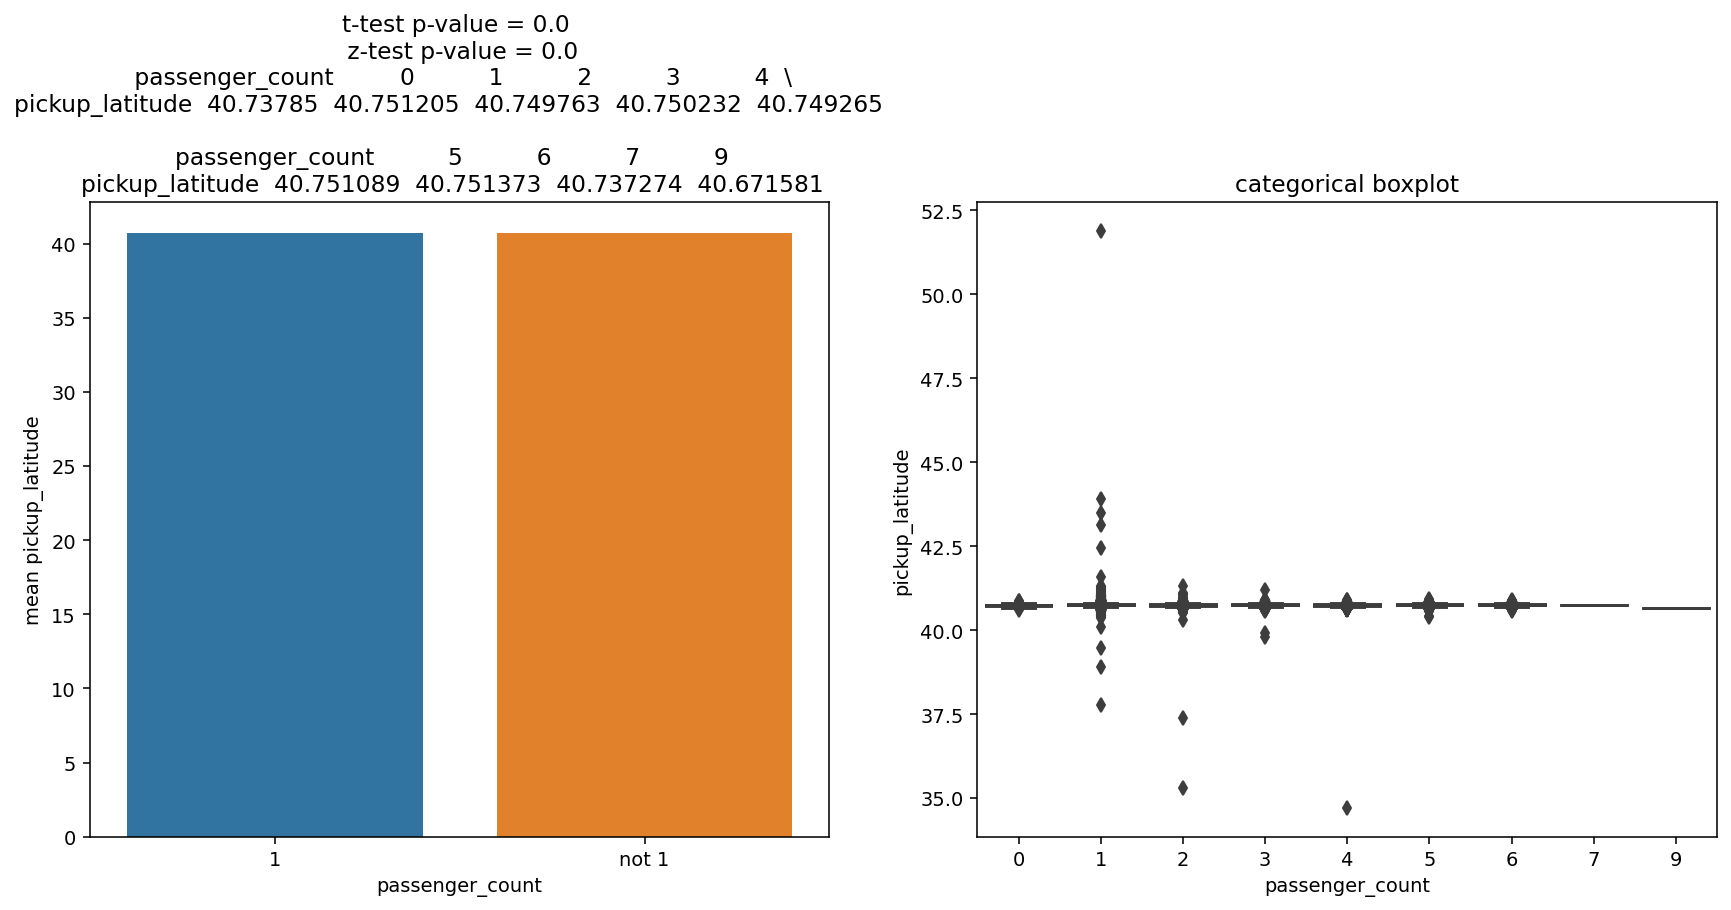

In [53]:
Bivariate_cont_cat(data, 'pickup_latitude', 'passenger_count', 1)

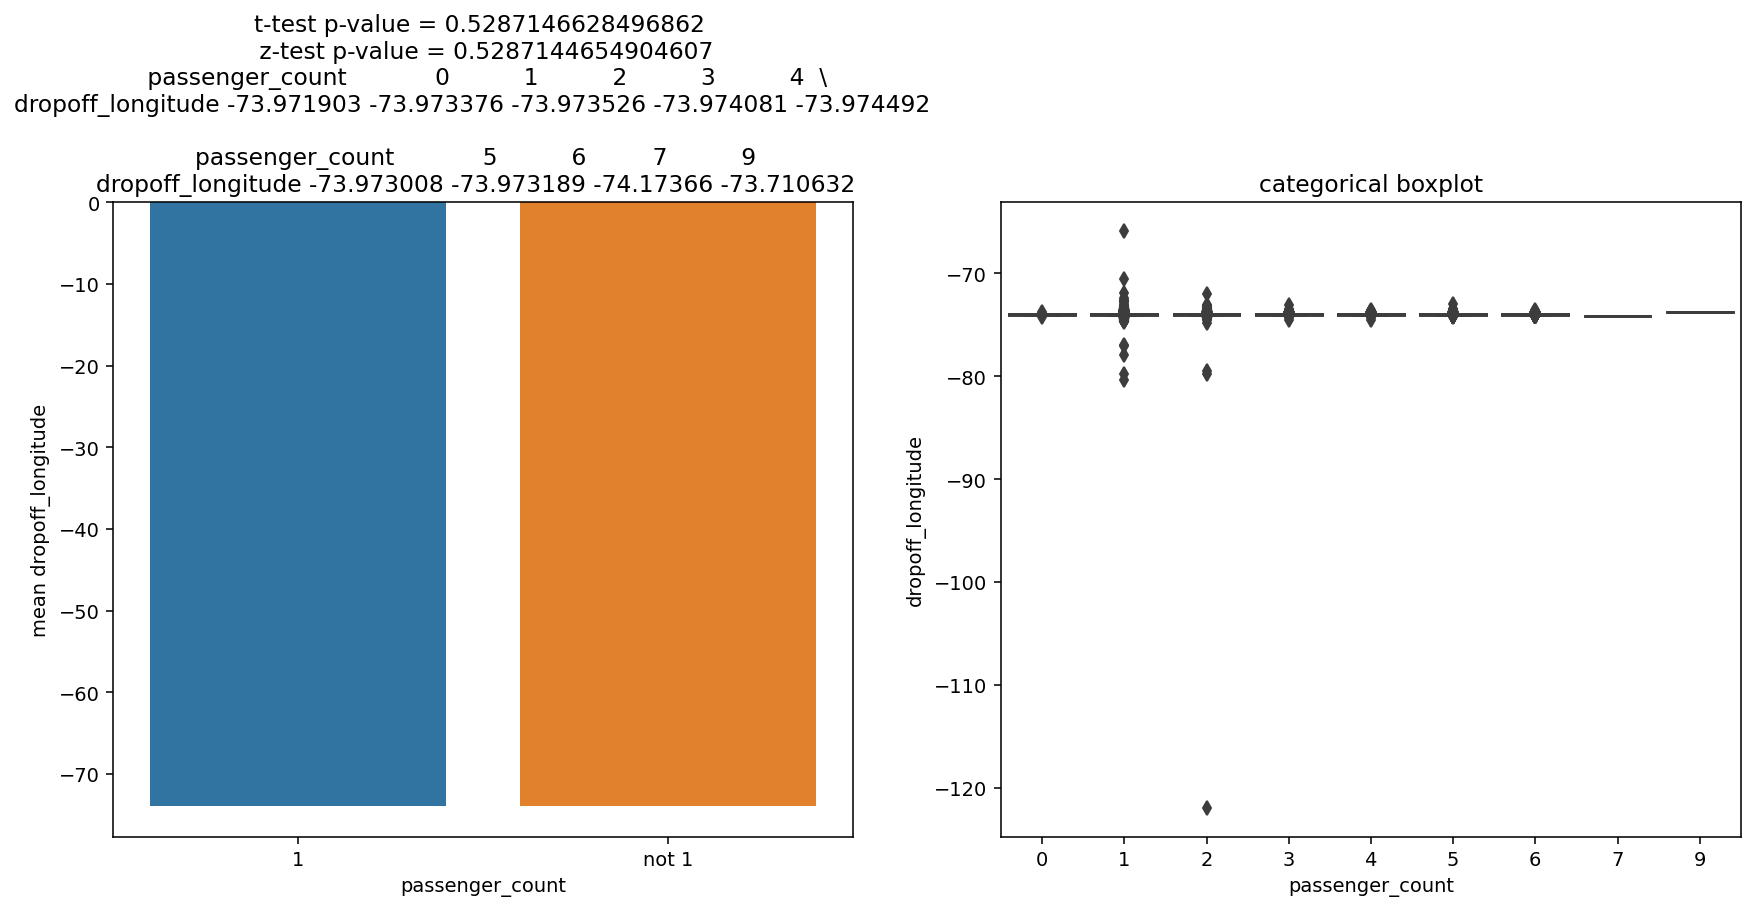

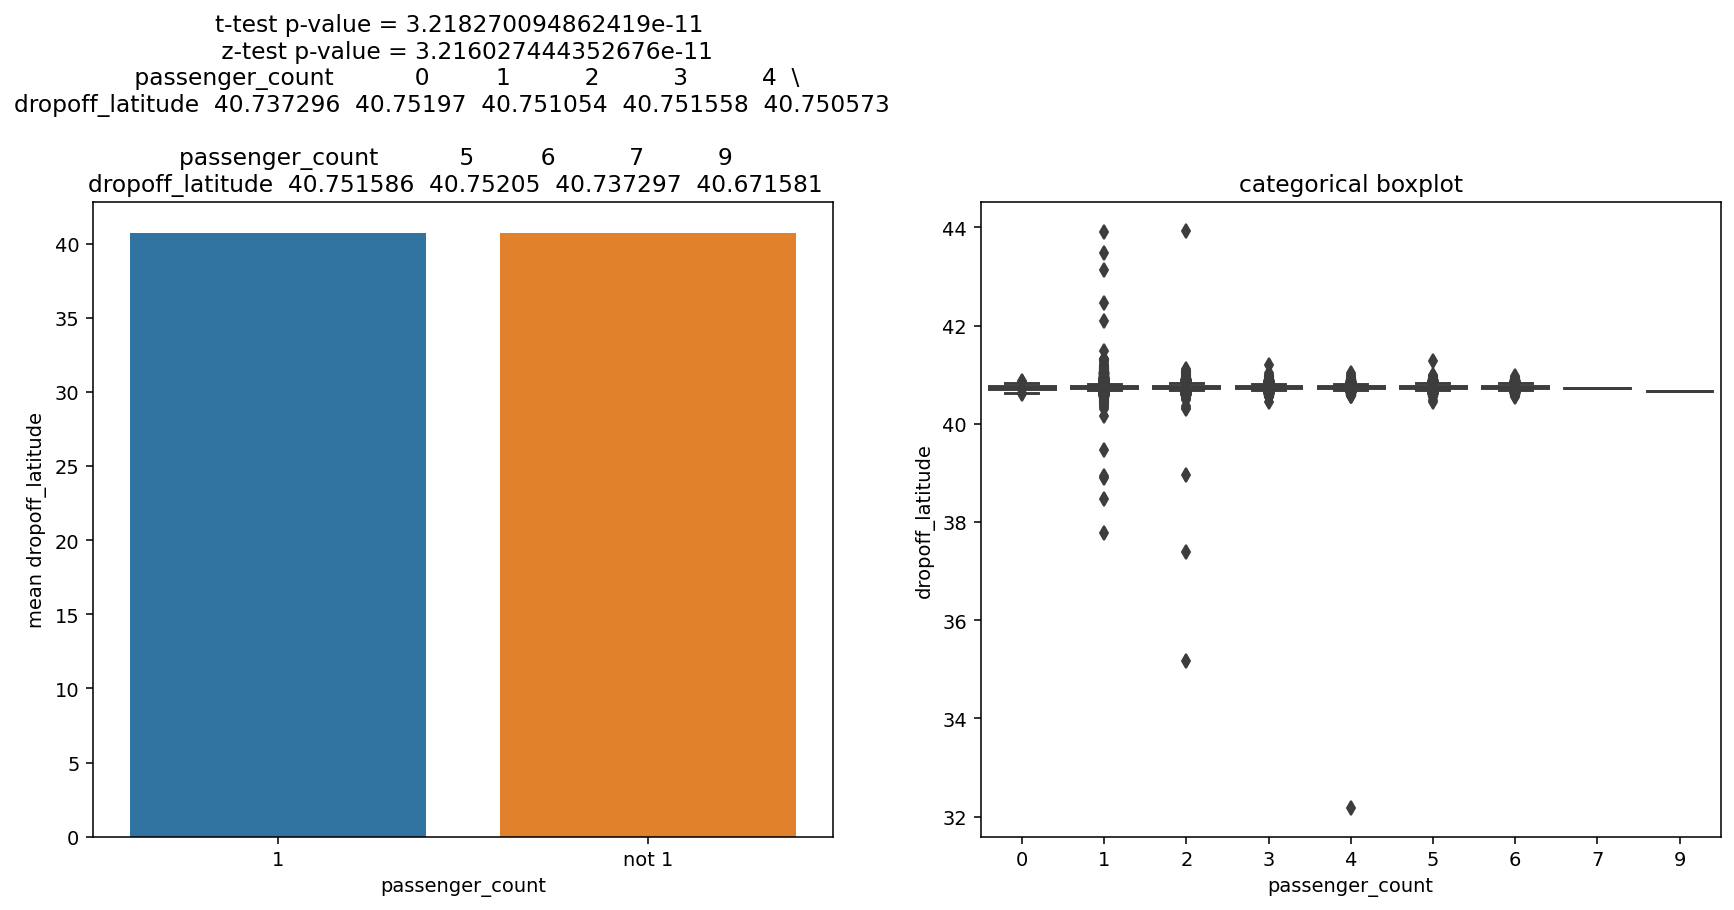

In [54]:
Bivariate_cont_cat(data, 'dropoff_longitude', 'passenger_count', 1)
Bivariate_cont_cat(data, 'dropoff_latitude', 'passenger_count', 1)

Inference
** no change in result that is pickup information or dropoff information does not affect passenger count

# 2. Are pickup ifo affect  vendor id?¶¶

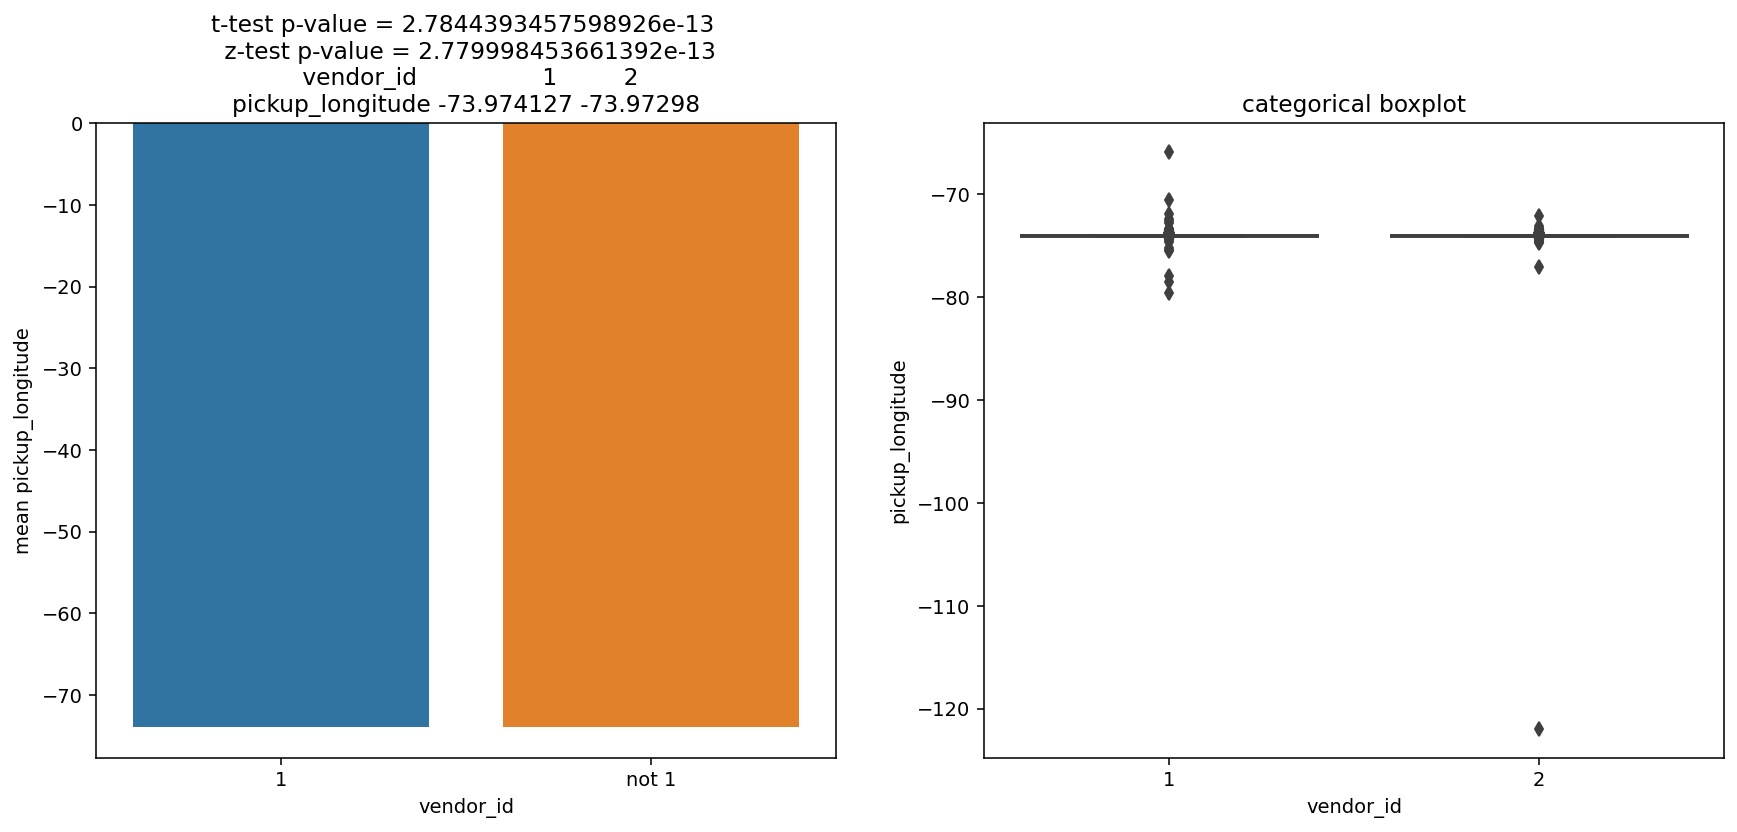

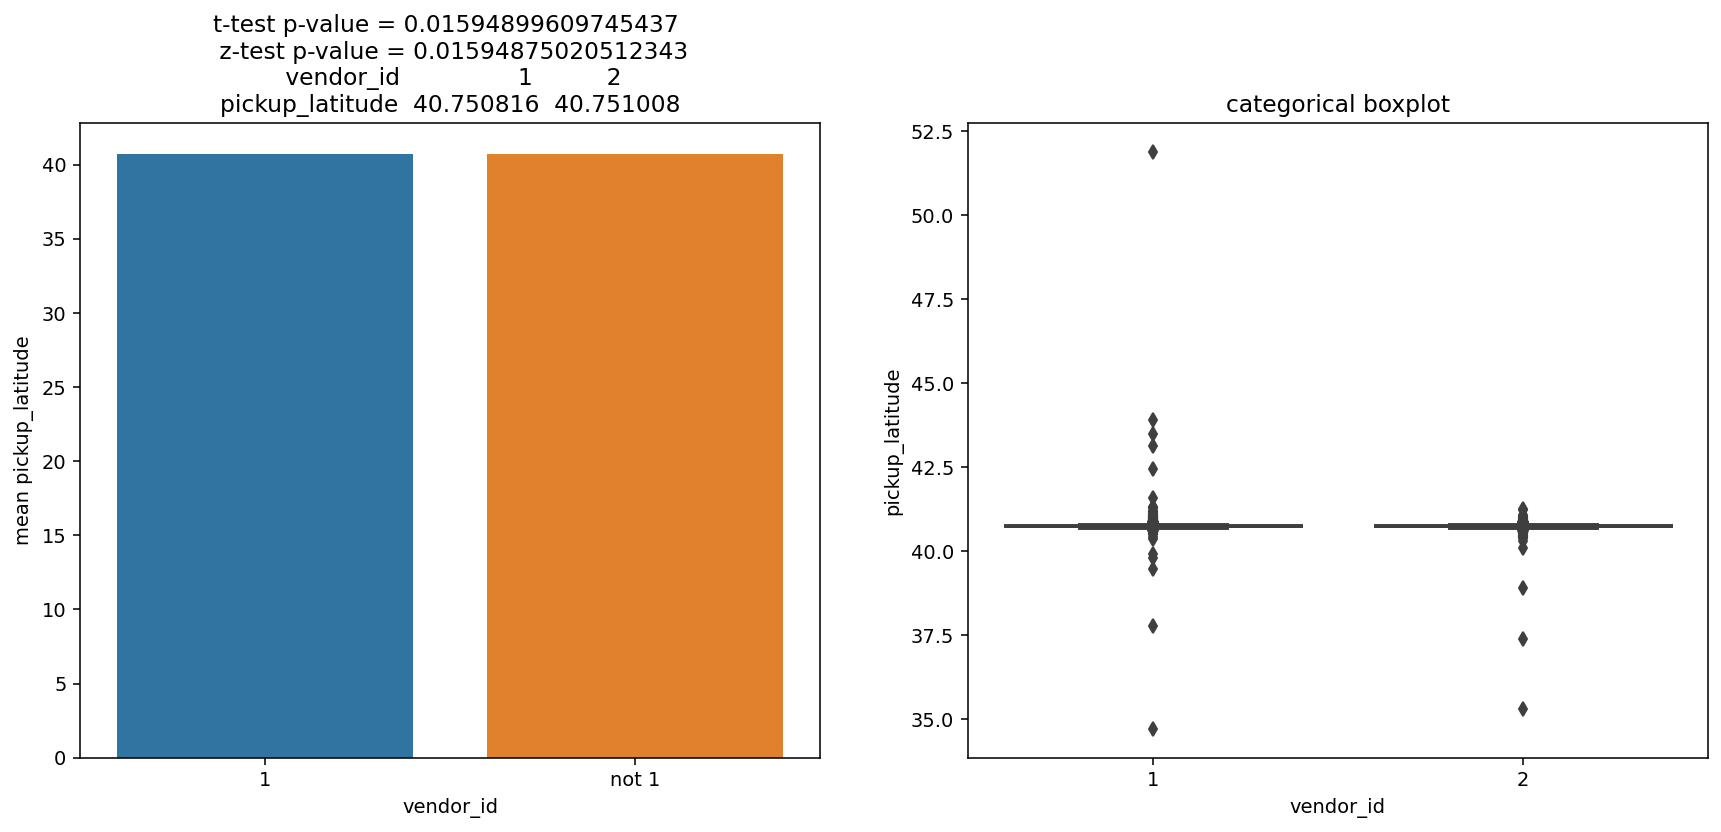

In [55]:
Bivariate_cont_cat(data, 'pickup_longitude', 'vendor_id', 1)
Bivariate_cont_cat(data, 'pickup_latitude', 'vendor_id', 1)

# 3. Are drop off ifo affect  vendor id?¶¶

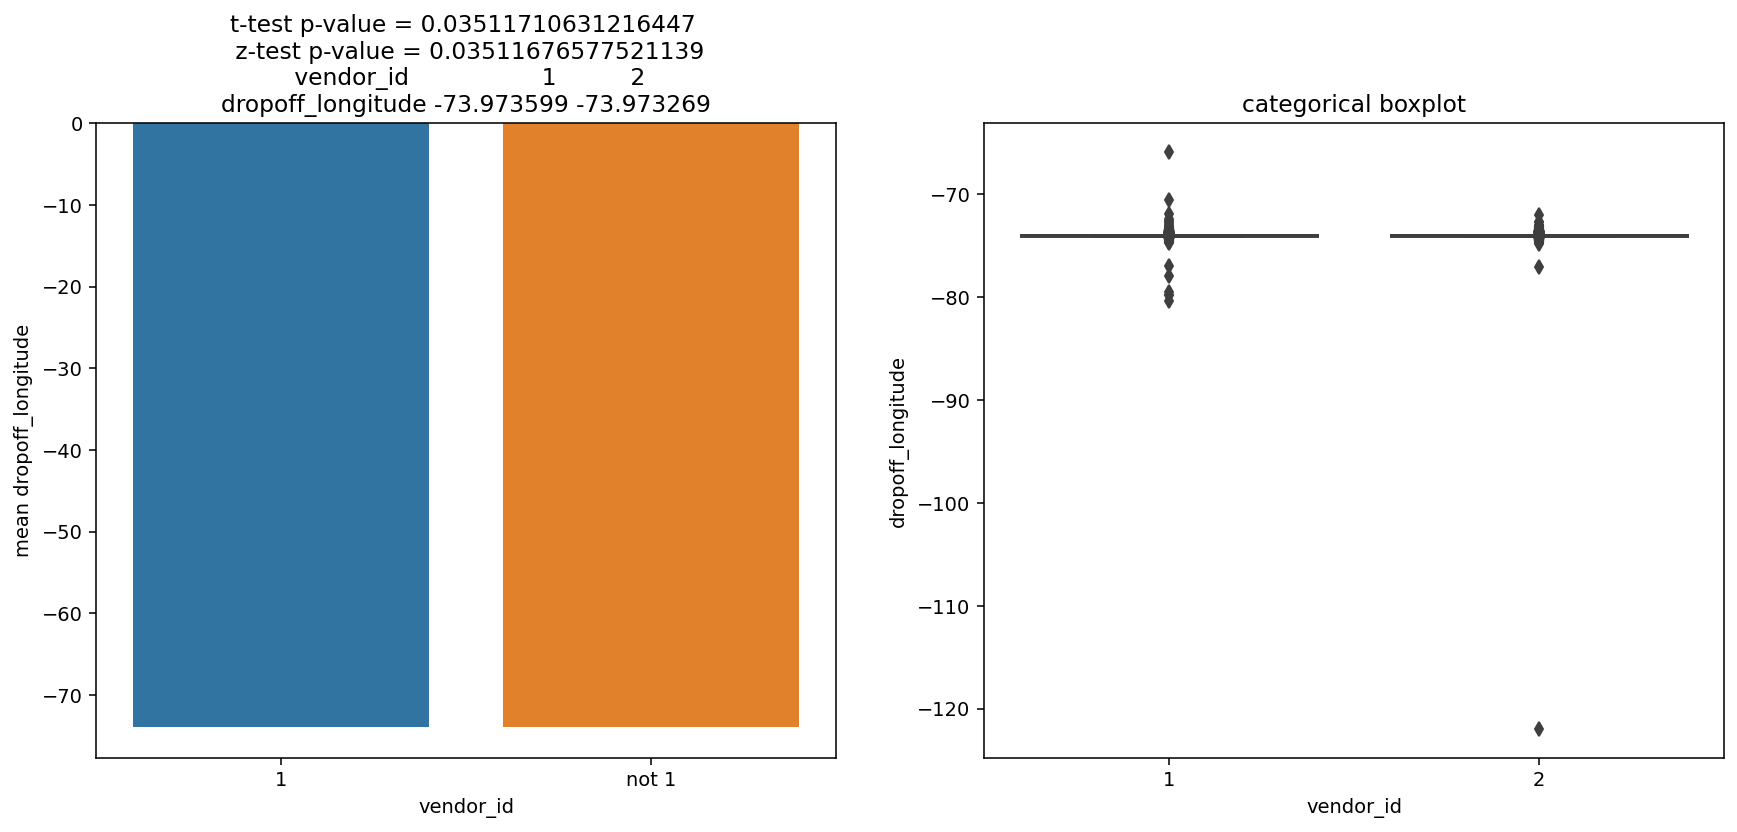

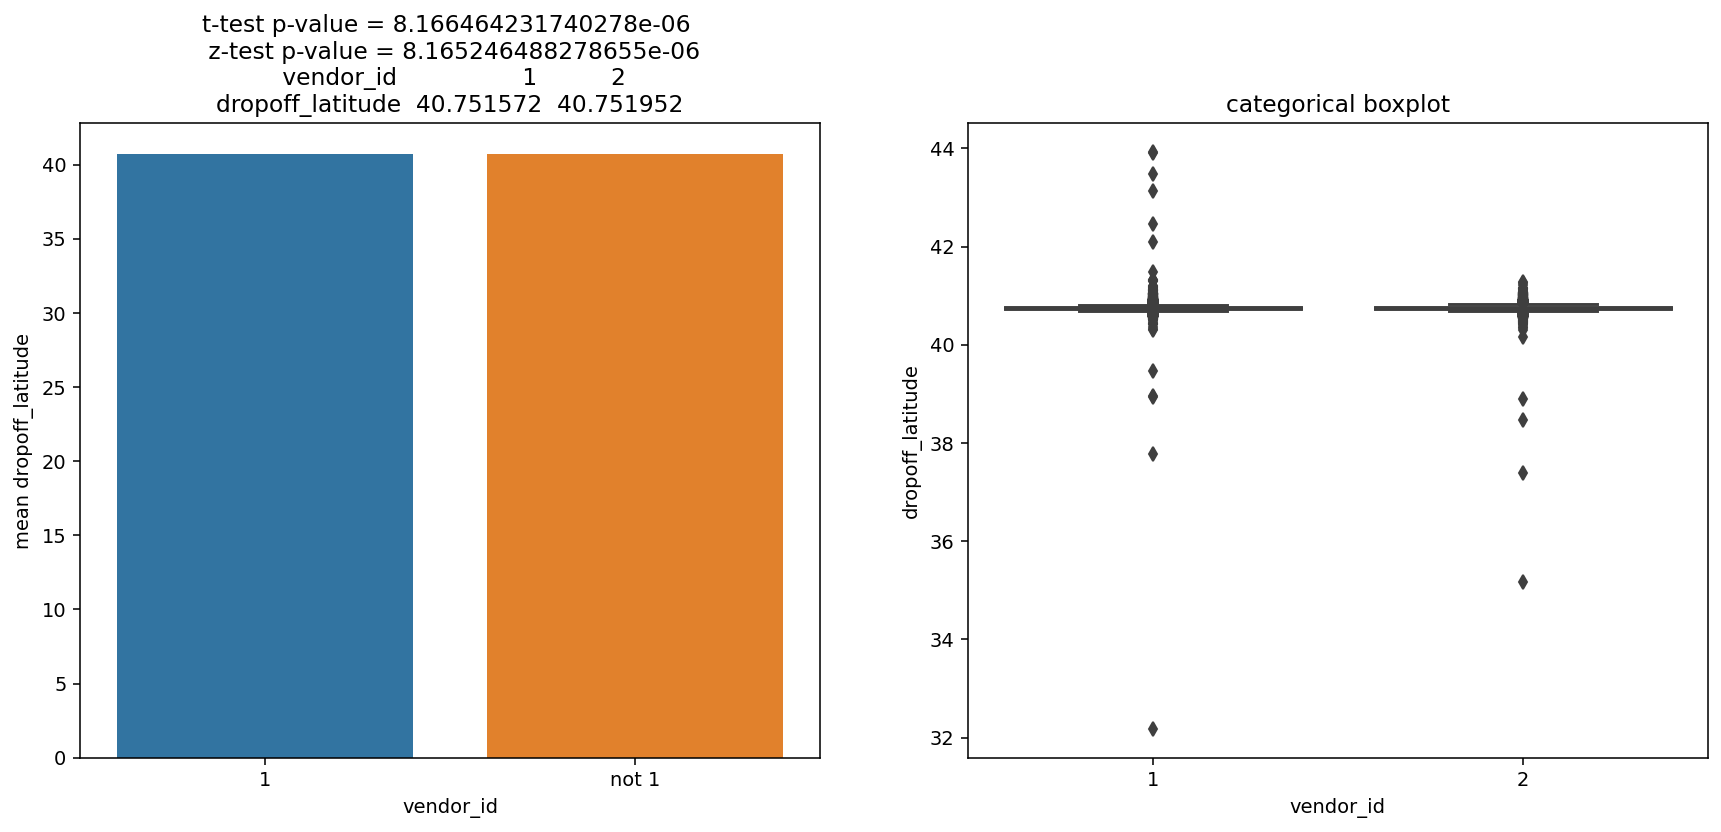

In [56]:
Bivariate_cont_cat(data, 'dropoff_longitude', 'vendor_id', 1)
Bivariate_cont_cat(data, 'dropoff_latitude', 'vendor_id', 1)

Inference
** no pickup info affects the passengr count and vendor id
** no drop off info affects the passengr count and vendor id

# Bivariate : Categorical-Categorical


List of Hypothesis to check under this combination
any connection between vendor id and passenger count


In [57]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [58]:
data.dtypes

id                    category
vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
log_trip_duration      float64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
dtype: object

** no more than 1 significant categoricsl column to do the bivariate analysis between cat-cat columns

In [59]:
data.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
doy_pickup            0
woy_pickup            0
moy_pickup            0
dow_pickup            0
doy_dropoff           0
woy_dropoff           0
moy_dropoff           0
dow_dropoff           0
dtype: int64

In [60]:
data.dtypes

id                    category
vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
log_trip_duration      float64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
dtype: object

# Conclusions 


1.The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5) i.e. about 17 minutes.
2.There are several suspiciously short rides with less than 10 seconds duration.
As discussed earlier, there are a few huge outliers near 12.
3.Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
4.Vendor 2 has more number of trips as compared to vendor 1
5.Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
6.Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
7.We see that most trips are concentrated between these lat long only with a few significant clusters. These clusters are represented by the numerous peaks in the lattitude and longitude histograms
8.Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
9.It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
10.Median trip duration does not vary much as can be seen from the above plot for different vendors.

11From the correlation heatmap we see that the lattitude and longitude features have higher correlation with the target as compared to the other features.

# #categorical feature is to be converted into numerical type before modeling

# Convert store_and_fwd_flag

In [61]:


data['store_and_fwd_flag'].value_counts()
dict_store_and_fwd_flag = {'Y': 1, 'N':0}
data.replace({'store_and_fwd_flag': dict_store_and_fwd_flag}, inplace = True)
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype("int")


# drop column store_and_fwd_flag
as this feature has no relevance in modeling as this is created after the target variable is determined.So can remove this

In [62]:

data.drop(['store_and_fwd_flag'],axis=1)



,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,400,5.993961,60,9,2,0,60,9,2,0
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,7.003974,71,10,3,4,71,10,3,4
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,7.400010,52,7,2,6,52,7,2,6
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,7.040536,5,1,1,1,5,1,1,1
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,848,6.744059,48,7,2,2,48,7,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2,-73.965919,40.789780,-73.952637,40.789181,296,5.693732,142,20,5,5,142,20,5,5
729318,id0102861,1,1,-73.996666,40.737434,-74.001320,40.731911,315,5.755742,53,8,2,0,53,8,2,0
729319,id0439699,1,1,-73.997849,40.761696,-74.001488,40.741207,673,6.513230,106,15,4,4,106,15,4,4
729320,id2078912,1,1,-74.006706,40.708244,-74.013550,40.713814,447,6.104793,171,24,6,6,171,24,6,6


# Feature Engineering -  standardisation
All features have to be converted into same scaling before modeling. This will improve the performance of model.
Here standardscaler is used for standardisation

In [63]:
data.dtypes

id                    category
vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag       int32
trip_duration            int64
log_trip_duration      float64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
dtype: object

# splitting of data into test and train and make prediction using linear regression and evaluate the model using test data

Data Dictionary
It is always a good idea to have the data dictionary handy.

id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
trip_duration - duration of the trip in seconds
Here dropoff_datetime and trip_duration are only available for the train set as that represents the target

# Performance of a basic model

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = data['trip_duration']
x = data.drop(['id','trip_duration'],axis = 1)
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=11)
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(pred)

[-154.47401153 1972.0141028   995.04044583 ... -692.10554177  447.86574821
 -165.37965624]


In [65]:

data.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration',
       'doy_pickup', 'woy_pickup', 'moy_pickup', 'dow_pickup', 'doy_dropoff',
       'woy_dropoff', 'moy_dropoff', 'dow_dropoff'],
      dtype='object')

Preprocessing & Feature Extraction
As is clear from the previous modules, we can only feed numeric features as input to our models. So our next task is to convert the features in numeric form. It is time to jump into getting our data ready for feeding into the model but before that it is important to use the variables to do some feature engineering as t

Some of my ideas to create new variables and the reasons are as follows

Difference between pickup and dropoff latitude - will give an idea about the distance covered which could be predictive
Difference between pickup and dropoff longitude - same reason as above
Haversine distance between pickup and dropoff co-ordinates - to capture the actual distance travelled
Pickup minute - since pickup hour is an important variable, the minute of pickup might well have been predictive
Pickup day of year - same reason as above

DateTime Conversion
The datetime features from csv files are read as strings and in order to easily extract features like day of week, 
month, year etc. we need to convert it into datetime format of python.

# Scaling and standardisation

In [66]:
from sklearn.preprocessing import StandardScaler
num_cols = ['vendor_id',
            'store_and_fwd_flag', 'doy_pickup',
            'woy_pickup','moy_pickup', 'moy_pickup', 
            'dow_pickup','doy_dropoff', 'woy_dropoff','moy_dropoff','dow_dropoff']
for i in num_cols:
    data[i] = np.log(data[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled)

# After stsndardisation every feature is converted into numerical unified form

In [67]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.931533,-0.074634,-0.617475,-0.565978,-0.903451,-0.903451,-1.560135,-0.617684,-0.566066,-0.903579,-1.560235
1,-1.073500,-0.074634,-0.403785,-0.449069,-0.308411,-0.308411,0.486578,-0.403997,-0.449117,-0.308594,0.483973
2,0.931533,-0.074634,-0.772972,-0.799816,-0.903451,-0.903451,1.509755,-0.773179,-0.799986,-0.903579,1.505896
3,0.931533,-0.074634,-1.687995,-1.501497,-1.498526,-1.498526,-1.048412,-1.688189,-1.501909,-1.498599,-1.049138
4,-1.073500,-0.074634,-0.850749,-0.799816,-0.903451,-0.903451,-0.536718,-0.850954,-0.799986,-0.903579,-0.538071


# merging of scaled data with original dataset

In [68]:
df_df_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

# Model Building

In [69]:
from sklearn.model_selection import train_test_split
y = data['trip_duration']
x = data.drop(['id','trip_duration'],axis = 1)
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=11)

# Linear regression after feature standardisation - model fitting an prediction using test data

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [71]:
pred

array([-154.86895445, 1970.61558779,  994.95451079, ..., -691.20797994,
        447.82259114, -165.49287061])

In [72]:
print(ytest.shape)
print(pred.shape)
import math

 
MSE = np.square(np.subtract(ytest,pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

(243108,)
(243108,)
Root Mean Square Error:

2857.529074670983


# importing Linear Regression and metric mean square error

In [73]:

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

# Creating instance of Linear Regresssion

In [74]:

lr = LR()

# Fitting the model
lr.fit(xtrain, ytrain)

LinearRegression()

# Predicting over the Train Set and calculating error

In [75]:

train_predict = lr.predict(xtrain)
k = mae(train_predict, ytrain)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 612.9858045072981


# Predicting over the Test Set and calculating error

In [76]:

test_predict = lr.predict(xtest)
k = mae(test_predict, ytest)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     617.5919895239164


# listing coefficient parameters

In [77]:
#parameters
lr.coef_

array([ 3.58324740e-01,  4.69174305e+02,  8.73681724e+02, -6.95431162e+02,
        1.17816624e+03,  1.31244492e+03,  6.49684753e+01,  3.36525704e+00,
       -8.16404806e+05, -1.15931949e+03,  3.11111059e+03,  3.11111059e+03,
        2.99327549e+03,  8.16361500e+05,  1.17591467e+03, -6.20157035e+03,
       -3.01004200e+03])

# bar graph using coefficient parameters and target variable

Text(0.5, 1.0, 'Coefficient plot')

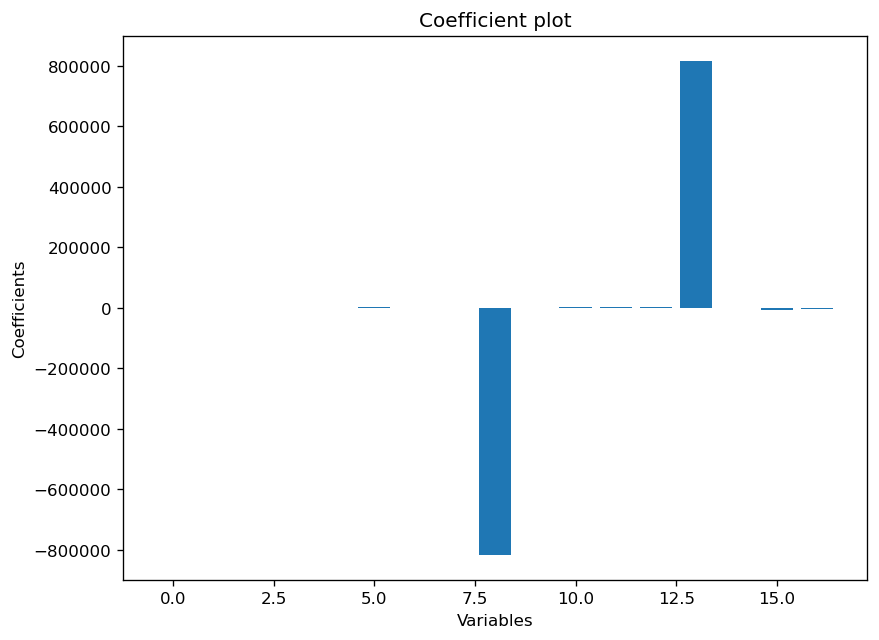

In [78]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(xtrain.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# Checking initial assumptions of Linear Model

In [79]:

# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : ytest,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
468874,289,-154.868954,443.868954
266246,1699,1970.615588,-271.615588
101150,672,994.954511,-322.954511
389335,106,-1546.540890,1652.540890
233327,1158,1591.882176,-433.882176


Inference
Only 2 features has positive residuals all others are negetively affected target variable

In [80]:
residuals.shape

(243108, 3)

# Plotting residual curve

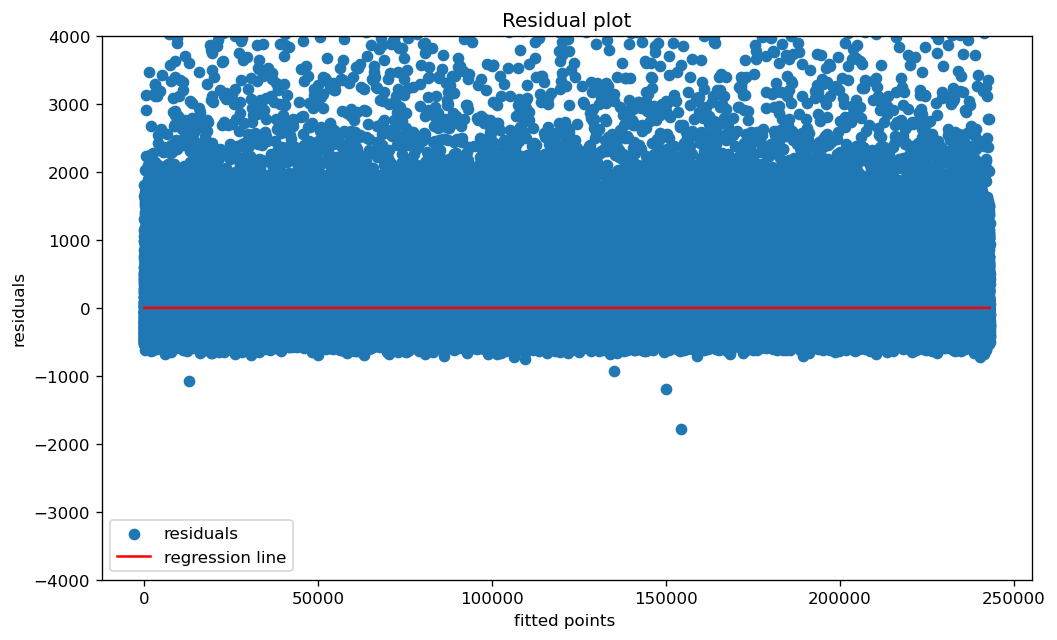

In [81]:

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,243108)
k = [0 for i in range(0,243108)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

regression line is at bottom part of graph

# #Checking Distribution of Residuals
# Histogram for distribution

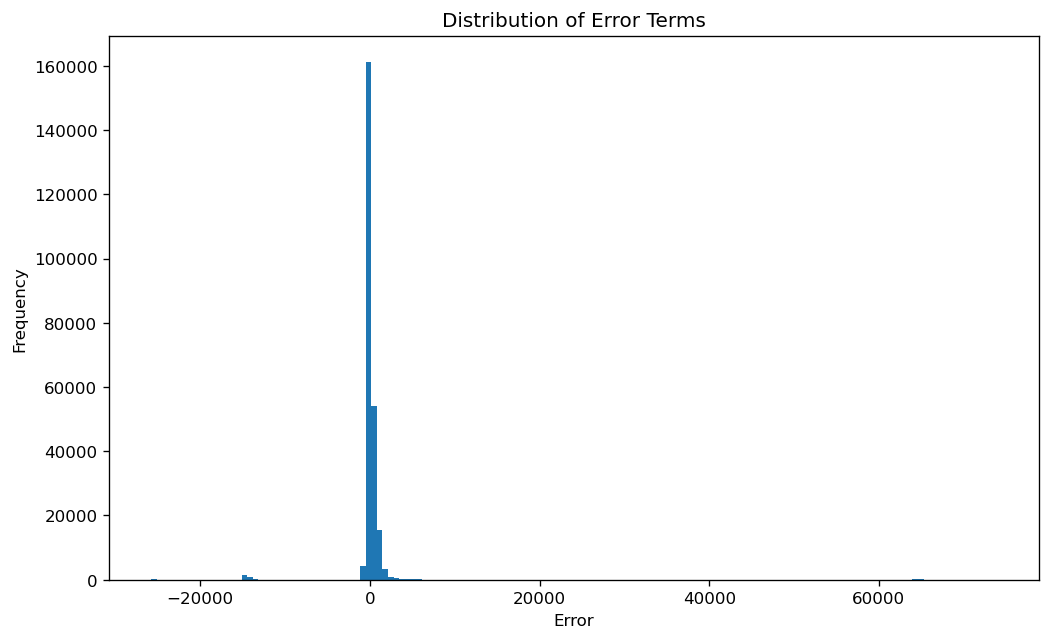

In [82]:


plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

graph gives a positively skewed distribution

# qq plot

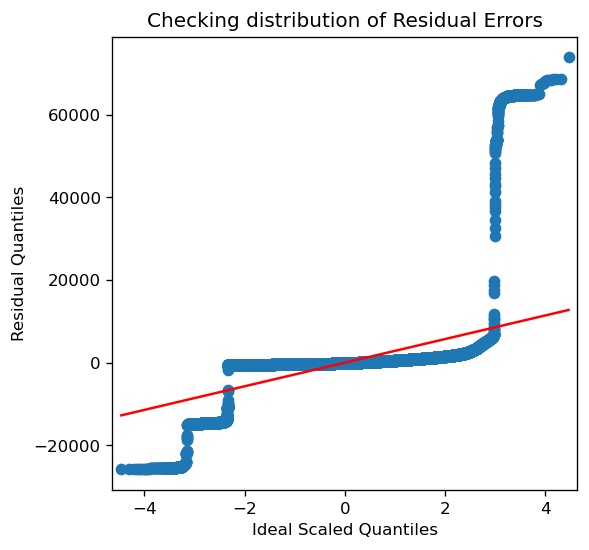

In [83]:

from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

In [84]:
data.columns
data['pickup_longitude']

0        -73.953918
1        -73.988312
2        -73.997314
3        -73.961670
4        -74.017120
            ...    
729317   -73.965919
729318   -73.996666
729319   -73.997849
729320   -74.006706
729321   -74.003342
Name: pickup_longitude, Length: 729322, dtype: float64

# Model Interpretability


In [85]:

# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(xtrain, ytrain)

LinearRegression(normalize=True)

In [86]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(xtrain)
k = mae(train_predict, ytrain)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 612.9858045075122


In [87]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(xtest)
k = mae(test_predict, ytest)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     617.591989524117


Text(0.5, 1.0, 'Normalized Coefficient plot')

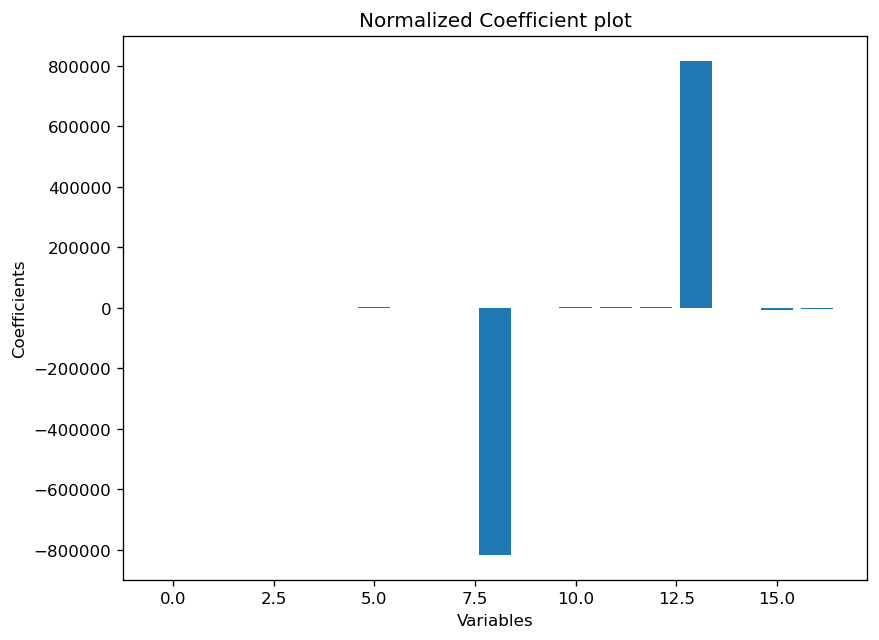

In [88]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(xtrain.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant. So let us try removing them and build the model again.

In [89]:
data.head()
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 18), (729322,))

In [90]:
lr.coef_.shape
data.columns
print(x.columns)

Index([               'id',   'passenger_count',  'pickup_longitude',
         'pickup_latitude', 'dropoff_longitude',  'dropoff_latitude',
       'log_trip_duration',                   0,                   1,
                         2,                   3,                   4,
                         5,                   6,                   7,
                         8,                   9,                  10],
      dtype='object')


# #Arranging coefficients with features

In [91]:

Coefficients = pd.DataFrame({
    'Variable'    : x.columns[1:6],
    'coefficient' : lr.coef_[1:6]
})
Coefficients.head()

,Variable,coefficient
0,passenger_count,469.174305
1,pickup_longitude,873.681724
2,pickup_latitude,-695.431162
3,dropoff_longitude,1178.166239
4,dropoff_latitude,1312.444922


In [92]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [93]:
subset = data[sig_var['Variable'].values]
subset.head()

,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude
0,1,-73.953918,-73.963875,40.771164
1,2,-73.988312,-73.994751,40.694931
2,2,-73.997314,-73.948029,40.774918
3,6,-73.961670,-73.956779,40.780628
4,1,-74.017120,-73.988182,40.740631


Splitting the data into train set and the test set
## According to this the only significant variable is dropof latitude

In [94]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [95]:
#Implementing Linear Regression
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [96]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [97]:
#Predicting over the train set
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 604.3413873676809


Predicting over the test set

In [98]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     597.519972337675


Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

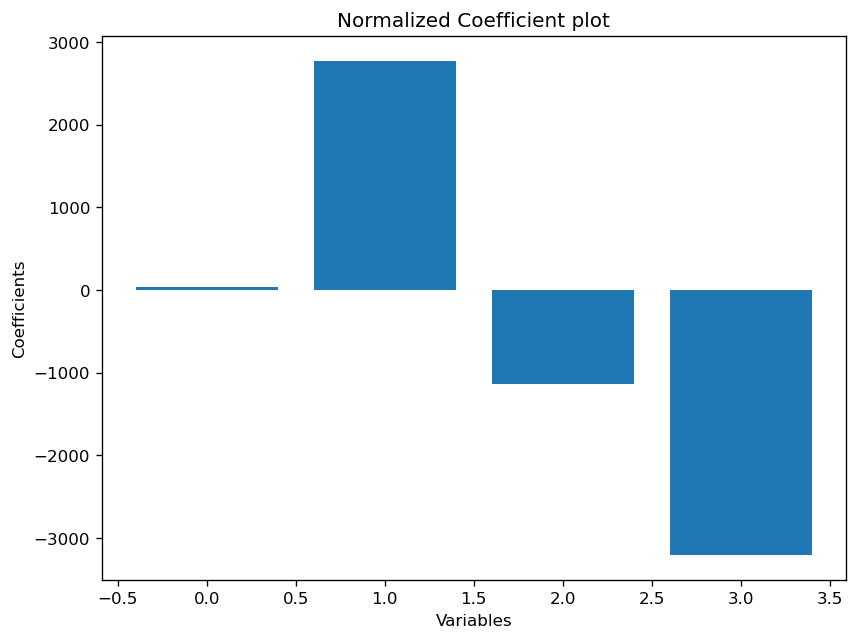

In [99]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

# Decision tree visualisation

In [106]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [107]:
dtree = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)
dtree.fit(xtrain, ytrain)

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)

In [109]:
decision_tree = tree.export_graphviz(dtree,out_file='tree.dot',feature_names=xtrain.columns,max_depth=2,filled=True)


As is clear from the above decision tree the extra features added are adding a lot of value to our decision tree learning indicating that the additional features carry good value and are very important to the model.

Looking at this, seems like a good idea to try more advanced decision tree based techniques which we will look at in the next section.